In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import os
import numpy as np

In [11]:
path = '/media/user/volume2/students/s124md209_01/WangShengyuan/6222/Assignment1'
resultpath = os.path.join(path, 'result/results_m.csv')
imgpath = os.path.join(path, 'result/image/')

In [12]:
result = pd.read_csv(resultpath)

In [13]:
result

,Dataset,Reduction Method,Parameters,Explained Variance,Number of Components,Classifier,Accuracy,Reduction Time per Sample,Classification Time per Sample
0,mnist,none,NaN,NaN,64,knn,0.983333,NaN,0.000522s
1,mnist,none,NaN,NaN,64,linear,0.966667,NaN,0.002587s
2,mnist,none,NaN,NaN,64,mahalanobis,0.933333,NaN,0.001977s
3,mnist,lda,NaN,NaN,9,knn,0.966667,0.000010s,0.000045s
4,mnist,lda,NaN,NaN,9,linear,0.955556,0.000011s,0.000819s
...,...,...,...,...,...,...,...,...,...
94,cifar10,pca+lda,0.95,0.95024,9,linear,0.416500,0.000234s,0.000173s
95,cifar10,pca+lda,0.95,0.95024,9,mahalanobis,0.299100,0.000215s,0.000192s
96,cifar10,cnn_features,NaN,NaN,512,knn,0.512800,NaN,0.000093s
97,cifar10,cnn_features,NaN,NaN,512,linear,0.605600,NaN,0.000532s


/tmp/ipykernel_14883/127543096.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['Normalized_Accuracy'] = scaler.fit_transform(pca_df[['Accuracy']])
/tmp/ipykernel_14883/127543096.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_classifier_df = dataset_classifier_df.groupby('Number of Components').mean().reset_index()
/tmp/ipykernel_14883/127543096.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

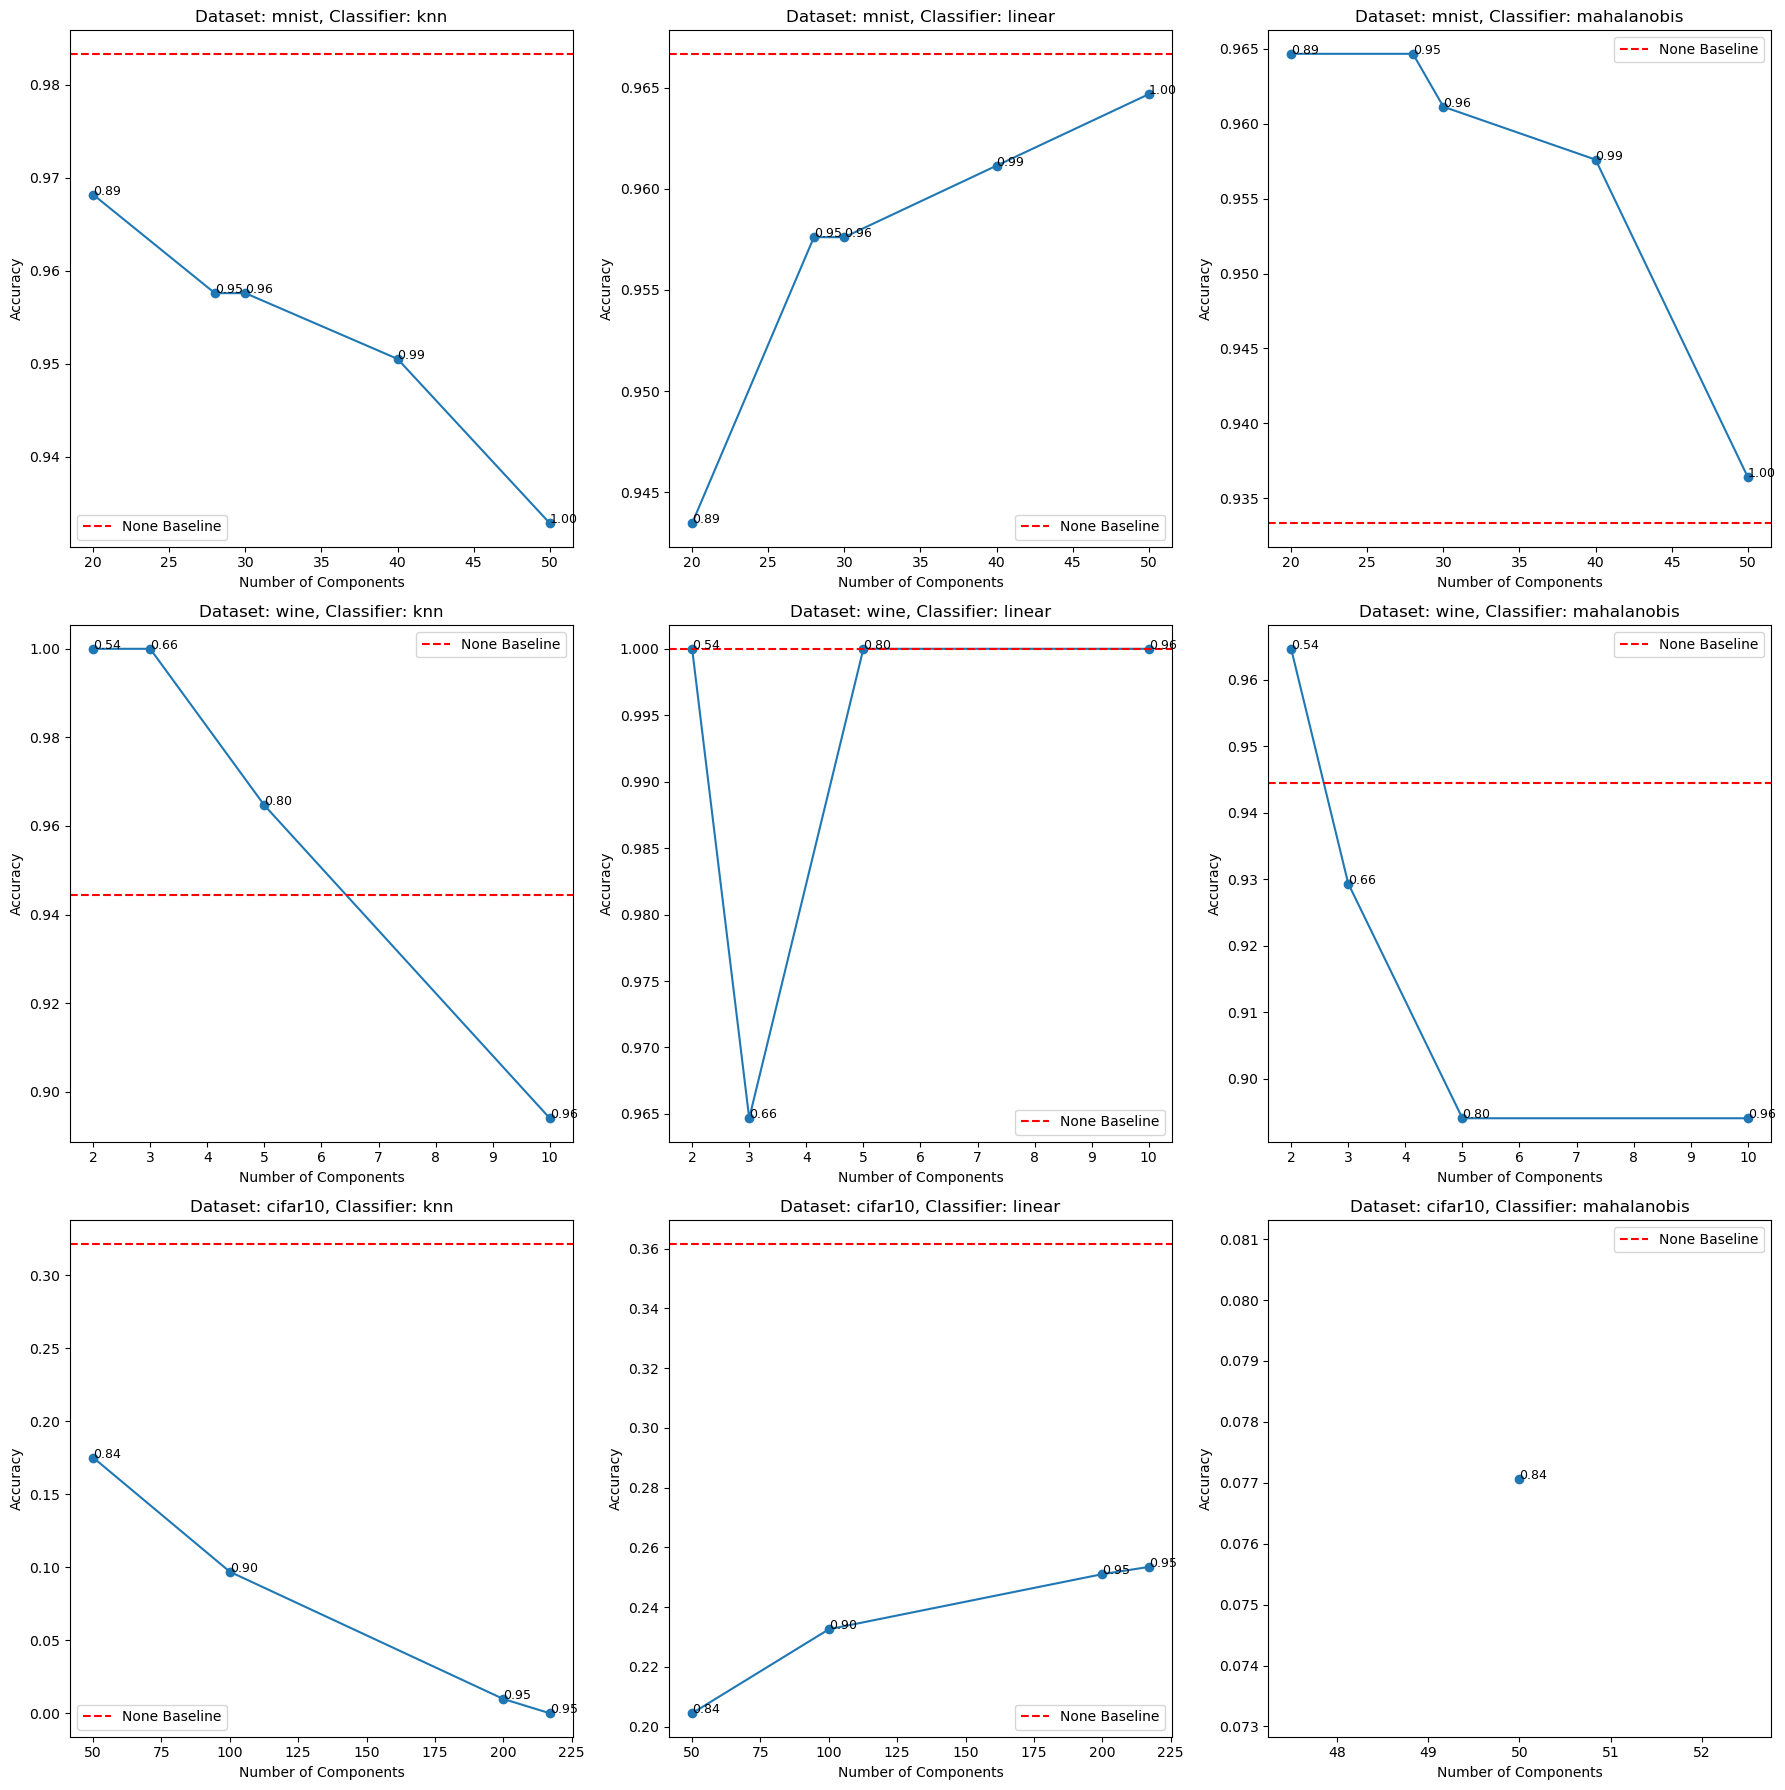

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [37]:
# 过滤数据，只保留使用PCA方法的数据
pca_df = result[result['Reduction Method'] == 'pca']

# 提取所需的数据
datasets = pca_df['Dataset'].unique()
classifiers = pca_df['Classifier'].unique()

# 创建3x3的子图
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# 归一化准确性
scaler = MinMaxScaler()
pca_df['Normalized_Accuracy'] = scaler.fit_transform(pca_df[['Accuracy']])

# 为每个数据集和分类器绘制子图
for i, dataset in enumerate(datasets):
    for j, classifier in enumerate(classifiers):
        ax = axes[i, j]
        dataset_classifier_df = pca_df[(pca_df['Dataset'] == dataset) & (pca_df['Classifier'] == classifier)]
        # 确保每个参数值只对应一个准确性值
        dataset_classifier_df = dataset_classifier_df.groupby('Number of Components').mean().reset_index()
        ax.plot(dataset_classifier_df['Number of Components'].astype(float), dataset_classifier_df['Normalized_Accuracy'], marker='o', linestyle='-')
        
        # 获取降维方法为none的基准值
        none_df = result[(result['Dataset'] == dataset) & (result['Classifier'] == classifier) & (result['Reduction Method'] == 'none')]
        if not none_df.empty:
            none_accuracy = none_df['Accuracy'].values[0]
            ax.axhline(y=none_accuracy, color='r', linestyle='--', label='None Baseline')
        
        ax.set_title(f'Dataset: {dataset}, Classifier: {classifier}')
        ax.set_xlabel('Number of Components')
        ax.set_ylabel('Accuracy')
        
        # 添加方差解释性的标注
        for k, row in dataset_classifier_df.iterrows():
            ax.text(row['Number of Components'], row['Normalized_Accuracy'], f"{row['Explained Variance']:.2f}", fontsize=9)
        
        ax.legend()

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

# 保存图像
fig.savefig(os.path.join(imgpath, 'pca_accuracy.png'))

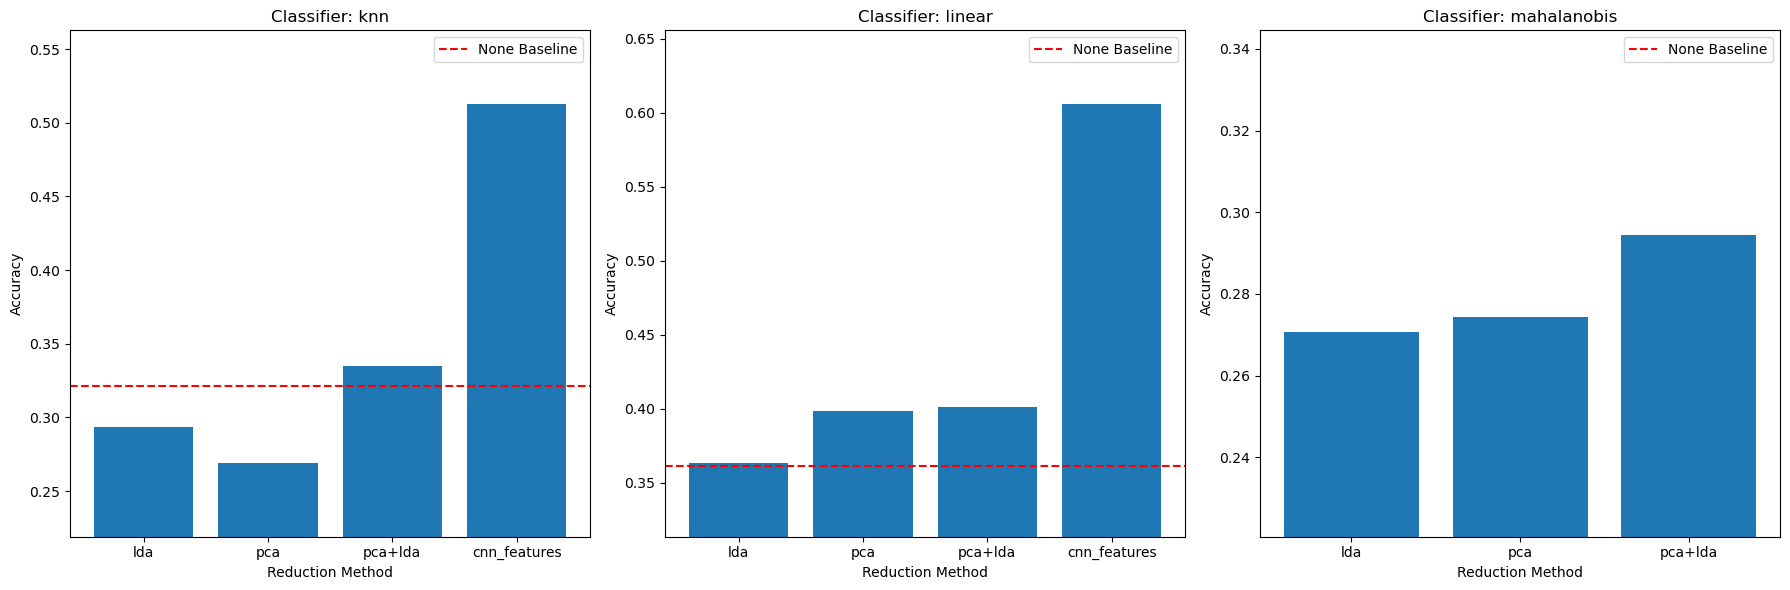

In [38]:
# 过滤数据，只保留 CIFAR-10 数据集的数据
cifar10_df = result[result['Dataset'] == 'cifar10']

# 提取所需的数据
reduction_methods = cifar10_df['Reduction Method'].unique()
classifiers = cifar10_df['Classifier'].unique()

# 创建3个子图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 为每个分类器绘制条形图
for ax, classifier in zip(axes, classifiers):
    classifier_df = cifar10_df[cifar10_df['Classifier'] == classifier]
    
    # 获取降维方法为none的基准值
    none_df = classifier_df[classifier_df['Reduction Method'] == 'none']
    if not none_df.empty:
        none_accuracy = none_df['Accuracy'].values[0]
        ax.axhline(y=none_accuracy, color='r', linestyle='--', label='None Baseline')
    
    # 去掉降维方法为none的数据
    classifier_df = classifier_df[classifier_df['Reduction Method'] != 'none']
    accuracies = classifier_df.groupby('Reduction Method')['Accuracy'].mean().reindex(reduction_methods)
    
    # 动态设置y轴范围
    y_min = accuracies.min() - 0.05  # 最小值减去0.05
    y_max = accuracies.max() + 0.05  # 最大值加上0.05
    
    # 绘制条形图
    ax.bar(accuracies.index, accuracies)
    
    ax.set_title(f'Classifier: {classifier}')
    ax.set_xlabel('Reduction Method')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(y_min, y_max)  # 设置y轴范围
    ax.legend()

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

# 保存图像
fig.savefig(os.path.join(imgpath, 'cifar10_accuracy.png'))